In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG
#from graphviz import Source

In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegressionCV

## Building the initial models

In [2]:
data = pd.read_csv("data/taxi_FINAL_FINAL.csv")

In [3]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'Location', 'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH',
       'tip_percent', 'tip_amount_binned'],
      dtype='object')

In [4]:
data.corr()["tip_percent"]

vendor_id            0.007933
passenger_count      0.002623
trip_distance       -0.142188
pickup_longitude    -0.003530
pickup_latitude     -0.002423
dropoff_longitude   -0.021144
dropoff_latitude    -0.008250
fare_amount         -0.157120
surcharge           -0.025569
mta_tax                   NaN
tip_amount           0.587897
tolls_amount        -0.001206
total_amount        -0.016519
duration            -0.142556
Location             0.005401
time_of_day         -0.009678
CRD                  0.121932
UNK                 -0.018596
NOC                 -0.161627
DIS                 -0.085927
CSH                  0.001160
tip_percent          1.000000
tip_amount_binned    0.590560
Name: tip_percent, dtype: float64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['tip_amount','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_datetime','dropoff_datetime','total_amount','mta_tax','tip_percent','tip_amount_binned']), data['tip_percent'], test_size=0.30, random_state=1)

In [6]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)

#y_pred= linreg.predict(x_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))
print('\n')
betas = pd.Series(linreg.coef_, index=x_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

The train score is 0.06278130205306531 and the test score is 0.06263373950604934


vendor_id         -0.003192
passenger_count    0.001381
trip_distance      0.003472
fare_amount       -0.050155
surcharge         -0.084353
tolls_amount       0.146439
duration           0.000062
Location           0.000238
time_of_day        0.006526
CRD                1.104272
UNK                0.910968
NOC               -1.639602
DIS               -1.602210
CSH                1.226572
Intercept          1.915181
dtype: float64


## Check for multicollinearity

,vendor_id,passenger_count,trip_distance,fare_amount,surcharge,tolls_amount,duration,Location,time_of_day,CRD,UNK,NOC,DIS,CSH
vendor_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_distance,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surcharge,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tolls_amount,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
time_of_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
CRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


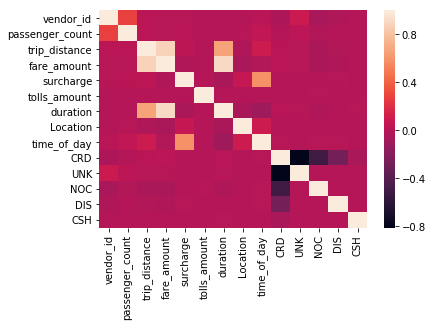

In [7]:
sns.heatmap(x_train.corr())
x_train.corr()[x_train.corr().abs() > 0.99]

In [8]:
def print_heavily_correlated_features(df, threshold=0.7):
  corr = df.corr().abs()
  corr = corr[corr > threshold]
  print(corr.count().sort_values(ascending=False) - 1)

print_heavily_correlated_features(x_train, 0.7)

fare_amount        2
UNK                1
CRD                1
duration           1
trip_distance      1
CSH                0
DIS                0
NOC                0
time_of_day        0
Location           0
tolls_amount       0
surcharge          0
passenger_count    0
vendor_id          0
dtype: int64


## Lasso Regression

In [9]:
# Fit the model
lasso = LassoCV()
lasso.fit(x_train, y_train)

# calculate the score
train_score = lasso.score(x_train, y_train)
test_score = lasso.score(x_test, y_test)

#y_pred= lasso.predict(x_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score)) 

# calculate betas
print('\n')
betas = pd.Series(lasso.coef_, index= x_train.columns)
betas = betas.append(pd.Series({"Intercept": lasso.intercept_}))
print(betas)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The train score is 0.023608911384644715 and the test score is 0.023734275197015764


vendor_id          0.000000
passenger_count    0.000000
trip_distance     -0.000000
fare_amount       -0.021349
surcharge         -0.000000
tolls_amount      -0.000000
duration          -0.000186
Location          -0.000000
time_of_day       -0.000000
CRD                0.000000
UNK               -0.000000
NOC               -0.000000
DIS               -0.000000
CSH                0.000000
Intercept          2.897565
dtype: float64


## Ridge 

In [11]:
# Fit the model
ridge = RidgeCV()
ridge.fit(x_train, y_train)

# calculate the score
train_score = ridge.score(x_train, y_train)
test_score = ridge.score(x_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score)) 

The train score is 0.06278064693245333 and the test score is 0.06263342549617568


## Logistic Regression

In [12]:
# Fit the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# calculate the score
train_score = logreg.score(x_train, y_train)
test_score = logreg.score(x_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.6312128441449042 and the test score is 0.6316423373045311


In [ ]:
## Switch back to L1 regularization instead of L2 which is automatic 

In [14]:
logregl1 = LogisticRegression(penalty='l1')
logregl1.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# calculate the score
train_score = logregl1.score(x_train, y_train)
test_score = logregl1.score(x_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.6312337348778839 and the test score is 0.6316626477393724


In [ ]:
##Still using L1 but using a different solver 

In [ ]:
# Fit the model
logregcv = LogisticRegressionCV(penalty='l1', solver='saga')
logregcv.fit(x_train, y_train)

In [ ]:
# calculate the score
train_score = logregcv.score(x_train, y_train)
test_score = logregcv.score(x_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

In [ ]:
y_pred = logregcv.predict(X_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(cfm, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual');

## Classification Error

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = logregl1.predict(X_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(cfm, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual');

In [ ]:
recall = cfm[1,1] / (cfm[1,0] + cfm[1,1])
precision = cfm[1, 1] / (cfm[0, 1] + cfm[1, 1])
print('The recall is {} and the precision is {}'.format(recall, precision))

In [129]:
from sklearn import metrics

cart_model = DecisionTreeRegressor(max_depth=5, random_state=1)
cart_model.fit(x_train, y_train)
y_pred= cart_model.predict(x_test)

train_score = cart_model.score(x_train, y_train)
test_score = cart_model.score(x_test, y_test)

#y_pred= cart_model.predict(x_test)

#print('On the validation set, the precision is {} and recall is {}'.format(pre, rec))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The train score is {} and the test score is {}'.format(train_score, test_score))

Mean Absolute Error: 0.45355278300531926
Mean Squared Error: 0.4167062107945469
Root Mean Squared Error: 0.6455278543909216
The train score is 0.40171923408195875 and the test score is 0.4018854857377855


In [ ]:
#pre = precision_score(y_test, y_pred) # since the dataset is imbalanced
#rec = recall_score(y_test, y_pred)

#print('The pre score is {} and the recall score is {}'.format(pre, recall))


In [130]:
all_models['cart_model'] = (train_score, test_score, cart_model, 'runs on x_train')

In [ ]:
#pre = precision_score(y_test, y_pred) # since the dataset is imbalanced
#rec = recall_score(y_test, y_pred)

#print('The pre score is {} and the recall score is {}'.format(pre, recall))

In [132]:
all_models['lasso'] = (train_score, test_score, lasso, 'runs on x_train')

In [ ]:
# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = df.columns[1:],
                   rounded = True, proportion = False, 
                  filled = True))
SVG(cart_graph.pipe(format='svg'))

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train the CART model
rfc_model = RandomForestRegressor(max_depth=5,random_state=1)
rfc_model.fit(x_train, y_train)
y_pred= rfc_model.predict(x_test)

train_score = rfc_model.score(x_train, y_train)
test_score = rfc_model.score(x_test, y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The train score is {} and the test score is {}'.format(train_score, test_score)) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: name 'metrics' is not defined

In [ ]:
#pre = precision_score(y_test, y_pred) # since the dataset is imbalanced
#rec = recall_score(y_test, y_pred)

#print('The pre score is {} and the recall score is {}'.format(pre, recall))

In [134]:
all_models['rfc'] = (train_score, test_score, rfc_model, 'runs on x_train')

## Feature Engineering

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rfc_model.predict(x_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(cfm, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual');

In [135]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'Location', 'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH'],
      dtype='object')

In [136]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,tolls_amount,total_amount,duration,Location,time_of_day,CRD,UNK,NOC,DIS,CSH
0,1,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,6.5,...,0.0,8.90,426,5,4,1,0,0,0,0
1,1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,8.5,...,0.0,11.40,540,4,4,1,0,0,0,0
2,1,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,11.5,...,0.0,14.00,899,5,4,1,0,0,0,0
3,1,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,7.5,...,0.0,10.20,403,5,4,1,0,0,0,0
4,1,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,6.0,...,0.0,8.75,383,5,4,1,0,0,0,0


In [137]:
cont = ["passenger_count","tip_distance","fare_amount","surcharge","tolls_amount","duration"]

In [145]:
base_corrs = data.corr().tip_amount.drop(index=['tip_amount','mta_tax',"pickup_longitude",
                        "pickup_latitude","dropoff_longitude","dropoff_latitude","total_amount"])
base_corrs

vendor_id         -0.031161
passenger_count   -0.003495
trip_distance      0.551027
fare_amount        0.624147
surcharge          0.048372
tolls_amount      -0.000341
duration           0.569341
Location          -0.020564
time_of_day        0.025375
CRD                0.085818
UNK               -0.008303
NOC               -0.119688
DIS               -0.063635
CSH                0.001348
Name: tip_amount, dtype: float64

In [154]:
for feature1 in base_corrs.index:
    for feature2 in base_corrs.index:
        if feature2 != feature1:
            # divide the two features to create a new feature
            new_feature = x_train[feature1] / x_train[feature2]
            new_corr = np.abs(np.round(np.corrcoef(new_feature, y_train)[0,1], 3))
            corr1 = np.abs(np.round(base_corrs[feature1], 3))
            corr2 = np.abs(np.round(base_corrs[feature2], 3))
            # add a threshold of 0.02 to make sure that the improvement is meaningful
            if new_corr > max(corr1, corr2)+0.015:
                print('{} {} combine to get correlation {} compared to {} {}'.format(
                    feature1, feature2, new_corr, corr1, corr2))

vendor_id time_of_day combine to get correlation 0.047 compared to 0.031 0.025
Location time_of_day combine to get correlation 0.044 compared to 0.021 0.025


In [155]:
for feature1 in base_corrs.index:
    for feature2 in base_corrs.index:
        if feature2 != feature1:
            # divide the two features to create a new feature
            new_feature = x_train[feature1] * x_train[feature2]
            new_corr = np.abs(np.round(np.corrcoef(new_feature, y_train)[0,1], 3))
            corr1 = np.abs(np.round(base_corrs[feature1], 3))
            corr2 = np.abs(np.round(base_corrs[feature2], 3))
            # add a threshold of 0.02 to make sure that the improvement is meaningful
            if new_corr > max(corr1, corr2)+0.015:
                print('{} {} combine to get correlation {} compared to {} {}'.format(
                    feature1, feature2, new_corr, corr1, corr2))

Try new model 

In [4]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'Location', 'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['tip_amount','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_datetime','dropoff_datetime','total_amount','mta_tax']), data['tip_amount'], test_size=0.30, random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = logregl1.predict(X_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(cfm, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual');